<h2><center>CS5785 Assignment 2, NLP </center></h2>
      
         
   <center>by Eunsol Choi(ec897), Ling Zhong(lz555)</center>

# Binary Classification on Text Data
## Goal: to tell if a tweet is announcing a natural disaster or not. Programmatically monitoring Twitter can contribute to detecting emergency situations. 
For training, we're using the 'disaster tweets' from kaggle 
dataset source: https://www.kaggle.com/c/nlp-getting-started/overview

### We used Bag of Words to vectorize the tweets after some preprocessing, and ran Bernoulli Naive Bayes, Logistic Regression, SVM, non-linear SVM. We compared f-1 scores of each. 

                    Naive Bayes, Bernoulli shows F1 score of 0.735658 
                    Logistic regression classfier shows F1 score of 0.745575
                    LinearSVM classifier shows F1 score of 0.7478668 
                    nonLinearSVM classifier shows F1 score of 0.7390300

## (a) load and observe the data
    (1) How many training and test data points are there? 
        train data: 7613 test data: 3263
    (2) What percentage of the training tweets are of real disasters, and what percentage or not?
        Real disaster:     43.0% (0.42966)
        Not disaster:  57.0% (0.57034)

In [1]:
import pandas as pd
import os.path
import numpy as np

In [2]:
#filedir = os.path.abspath("C:/Users/dd/Documents/CT/2020fall/AML/HW2") 
#filepath = os.join(filedir, filename) 

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
print("train data: ", train.shape)
print("test data: ", test.shape)

train data:  (7613, 5)
test data:  (3263, 4)


In [6]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
#Is the training dataset well balanced? YES. 
real_disaster_p = print((train['target'] == 1).value_counts()/7613) 

False    0.57034
True     0.42966
Name: target, dtype: float64


## (b) Split the train dataset 
    Randomly choose 70% of the data points in the training data as the train set, and the remaining 30% of the data as the dev set.

In [8]:
y = train.pop('target').values
X = train

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=3)
print("train data: ",X_train.shape)
print("dev data: ",X_dev.shape)

train data:  (5329, 4)
dev data:  (2284, 4)


In [10]:
X_train.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [11]:
#Check null values
X_train.isnull().sum()

id             0
keyword       41
location    1792
text           0
dtype: int64

## (c) Preprocess the Data
    
    • Convert all the words to lowercase to focus on the meaning of each word
    • Lemmatize all the words(i.e.,“running,”“run,” and “runs” are converted to “run” and and all of “good,” “well,” “better,” and “best” are converted to “good”; using nltk.stem). 
    • Strip punctuation because they are irrelevant to tell its relevance to disaster
    • Strip the stop words,e.g.,“the”,“and”,“or” because they are irrelevant to tell its relevance to disaster
    • Something else? removed stand-alone numbers, hastages and URLs

In [10]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /Users/dd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dd/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/dd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:

#Strip URL
def strip_URL (text):
    text = re.sub(r"http\S+","", text)
    return text

#Strip mentions
def strip_mention (text):
    text = re.sub(r"@[/\w/]*","", text)
    return text


#strip numbers 
def strip_numbers(text):
    return ''.join(c for c in text if not c.isdigit())


In [12]:
#=====cleaning training set========
#lowercase
X['tweet'] = X['text'].apply(lambda word: word.lower())
#stripURL,mention,punctuations, hashtags, and numbers 
X['tweet'] = X['tweet'].apply(lambda x: strip_URL(x))
X['tweet'] = X['tweet'].apply(lambda x: strip_mention(x))
X['tweet'] = X['tweet'].str.replace("[^a-zA-Z0-9]"," ")
X['tweet'] = X['tweet'].apply(lambda x: strip_numbers(x))


## tokenize and lemmatize

In [13]:
def tokenize(sentence):
    tokens = nltk.word_tokenize(sentence) 
    
    return tokens


# def sentenceLem(sentence):
#     tokens = nltk.word_tokenize(sentence) 
#     lemmatizer = WordNetLemmatizer()
#     lemmatized = ' '.join([lemmatizer.lemmatize(t) for t in tokens])
   
#     return lemmatized


def wordLem(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized = ' '.join([lemmatizer.lemmatize(t) for t in tokens])
   
    return lemmatized

In [14]:
#tokenize
X['tokenized'] = X['tweet'].apply(lambda x:tokenize(x))

In [15]:
#clean the tokenized tweets 
#Strip the stop words,e.g.,“the”,“and”,“or”.
stop_words = set(stopwords.words('english'))
X['cleantokens'] = X['tokenized'].apply\
                            (lambda x: [word for word in x if word not in stop_words])

In [16]:
#lemmatize
X['lemmatized'] = X['cleantokens'].apply(lambda x:wordLem(x))

In [17]:
X.head()

,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake m...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.70,test_size=0.30)
print("train data: ",X_train.shape)
print("dev data: ",X_dev.shape)

train data:  (5329, 8)
dev data:  (2284, 8)


# (d) Bag of Words 
represent each tweet using the binary “bag of words” model
- The idea is to build a vocabulary of the words appearing in the dataset
- represent each tweet by a feature vector x whose length is the same as the size of the vocabulary,
    where Xi = 1 if the i’th vocabulary word appears in that tweet, and xi = 0 otherwise. 
- choose some threshold M, and only include words that appear in at least k different tweets;
- we used CountVectorizer, binary=True, “min_df=M”

### Deciding the threshold M = 4 
    (1) The top 50% of sample bag of words appears at least 4 times. 
    Therefore We've set M=4
  
    (2) Created bagofwords vectors for both train and dev set.
 
    (3) There are 2323 features in our vocabularies

In [21]:
from itertools import *
from collections import Counter

# Took a 30% of the tokens as a sample
sampletokens = X['cleantokens'].sample(frac=0.3)
top50percent = int(sampletokens.shape[0]/2)
flattenedtokens = list(chain(*sampletokens))


#taking a look at how many times did the top 50% appear in the training tweets
Counter(flattenedtokens).most_common(top50percent)

[('like', 114),
 ('amp', 95),
 ('via', 72),
 ('new', 72),
 ('fire', 71),
 ('people', 68),
 ('one', 68),
 ('news', 66),
 ('get', 58),
 ('would', 50),
 ('police', 48),
 ('video', 46),
 ('disaster', 45),
 ('time', 43),
 ('u', 43),
 ('us', 42),
 ('got', 42),
 ('back', 39),
 ('still', 39),
 ('man', 39),
 ('emergency', 38),
 ('day', 38),
 ('suicide', 37),
 ('attack', 37),
 ('burning', 36),
 ('storm', 36),
 ('nuclear', 36),
 ('first', 36),
 ('see', 35),
 ('hiroshima', 35),
 ('w', 34),
 ('life', 33),
 ('old', 32),
 ('bomb', 32),
 ('body', 31),
 ('dead', 31),
 ('car', 31),
 ('going', 30),
 ('crash', 30),
 ('year', 30),
 ('love', 30),
 ('rt', 29),
 ('could', 29),
 ('say', 29),
 ('two', 29),
 ('reddit', 29),
 ('california', 29),
 ('know', 28),
 ('want', 28),
 ('make', 28),
 ('buildings', 27),
 ('mh', 27),
 ('accident', 27),
 ('hot', 27),
 ('many', 27),
 ('today', 27),
 ('fires', 27),
 ('never', 26),
 ('last', 26),
 ('go', 26),
 ('train', 26),
 ('pm', 26),
 ('take', 25),
 ('war', 25),
 ('way', 25)

### Create the Bag of Words, Vectorize the features (binary vectors of 0 and 1)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


#Set a threshold M
M = 4
#vectorize the training set 
count_vect = CountVectorizer(binary=True, min_df=M, lowercase=False)
BOW_X_train = count_vect.fit_transform(X_train['lemmatized'])
print(BOW_X_train.toarray(), BOW_X_train.toarray().shape)


#vectorize the dev set 
BOW_X_dev = count_vect.transform(X_dev['lemmatized'])
print(BOW_X_dev.toarray(), BOW_X_dev.toarray().shape)



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (5329, 2323)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]] (2284, 2323)


In [20]:
print("This bag-of-words has %d features." %(BOW_X_train.toarray().shape[1]))

This bag-of-words has 2323 features.


In [21]:
featurenames = count_vect.get_feature_names()

# (e) Naive Bayes Model, Bernoulli
###    Naive Bayes, Bernoulli shows F1 score of 0.735658

In [22]:
from sklearn.metrics import f1_score

def  f1(y_pred, y_true, model=''):
    F1 = f1_score(y_pred, y_true)
    print(model, "shows F1 score of {:4f}".format(F1))
    return F1
    
# Naive Bayes Bernoulli classifier
#codes from CS5785 lecture note 8

n = BOW_X_train.shape[0] #dataset size
d = BOW_X_train.shape[1] #number of features in our dataset
K = 2 #number of classes. Here we have two: disaster, not disaste

#build empty vectors of corresponding shapes
psis = np.zeros([K,d])
phis = np.zeros([K])


#compute parameters and fill in the vectors for each class
for k in range(K):
    X_k = BOW_X_train[y_train == k]
    psis[k] = np.mean(X_k, axis=0) #feature probability 
    phis[k] = X_k.shape[0] / float(n) #class proportion
    

print("phis of each class:", phis)


phis of each class: [0.56370801 0.43629199]


In [23]:
BOW_X_dev.shape

(2284, 2323)

In [25]:
def nb_predictions(x, psis, phis):
    #to compute \arg\max_y p(x|y)*p(y)
    
    #adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1 , n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    #clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)
    
    #compute log-probabilities 
    logpy = np.log(phis).reshape([K,1])
    logpxy = x*np.log(psis) + (1-x)*np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy
    
    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])




x_pred, computedlogpyx = nb_predictions(BOW_X_dev.toarray(), psis, phis)

f1(x_pred, y_dev, 'Naive Bayes, Bernoulli')

Naive Bayes, Bernoulli shows F1 score of 0.735658


0.735658042744657

# (f) Logistic regression prediction
### Logistic Regression shows F1 score of 0.745575

In [26]:
from sklearn.linear_model import LogisticRegression

# Fitting a simple Logistic Regression on BoW
logreg_bow = LogisticRegression(C=1.0)
lr_trained = logreg_bow.fit(BOW_X_train, y_train)

#metrics
lr_x_pred = lr_trained.predict(BOW_X_dev)

f1(lr_x_pred, y_dev, 'Logistic Regression')

Logistic Regression shows F1 score of 0.745575


0.745575221238938

#### Inspecting the weight vector, the most important words for deciding whether a tweet is about a real disaster or not are:
<font color=orange size=4.9><b> [ massacre, hailstorm, evacuated, migrant, typhoon, bombing, earthquake, storm, hiroshima, wildfire ] </b></font>


In [36]:
#https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    print('The top ten feature names are:')
    feature_names = vectorizer.get_feature_names()

    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[0])[-10:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in top10)))

In [30]:
class_labels = lr_trained.classes_  #disaster or not: 0,1 
print_top10(count_vect, lr_trained, class_labels)

The top ten feature names are:
0: massacre, hailstorm, evacuated, migrant, typhoon, bombing, earthquake, storm, hiroshima, wildfire
1: massacre, hailstorm, evacuated, migrant, typhoon, bombing, earthquake, storm, hiroshima, wildfire


### Memo:
#### When random_state=1:
####  LR:   evacuated bombing flood derailment wildfire storm typhoon massacre hiroshima earthquake
####  LSVM:  bombing wildfire derailment drought flood typhoon storm massacre hiroshima earthquake

# (g) Linear SVM
 - For each value of C, train the classifier on the train set, and compute its F1-score on the dev set
 - Creat a plot of the resultant F1-score for each C on dev set
 - Find best C and compare the F-1 score with linear regression classifier
 - Inspect the weight vector of the Best LinearClassifier and find the most important word for deciding disaster or not. Are they same with those of linear regression classifier?
 
 ### C = 0.04  yields the best classification performance with F1-score of 0.747866

When C=  0.001
LinearSVM Classifier shows F1 score of 0.509954
When C=  0.01
LinearSVM Classifier shows F1 score of 0.729875
When C=  0.02
LinearSVM Classifier shows F1 score of 0.736597
When C=  0.04
LinearSVM Classifier shows F1 score of 0.747866
When C=  0.06
LinearSVM Classifier shows F1 score of 0.747748
When C=  0.08
LinearSVM Classifier shows F1 score of 0.744134
When C=  0.1
LinearSVM Classifier shows F1 score of 0.742921
When C=  0.2
LinearSVM Classifier shows F1 score of 0.737357
When C=  1.0
LinearSVM Classifier shows F1 score of 0.721552
When C=  10.0
LinearSVM Classifier shows F1 score of 0.686192


/Users/dd/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


When C=  100.0
LinearSVM Classifier shows F1 score of 0.664954


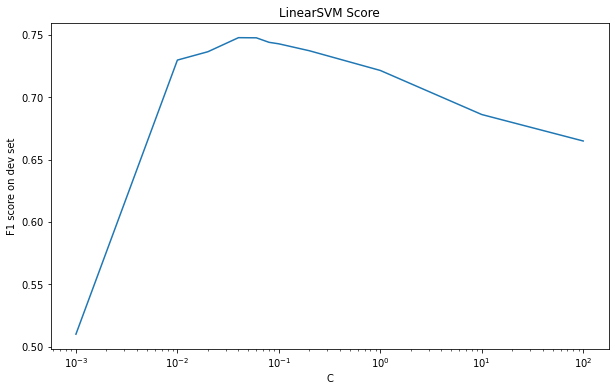

C = 0.04  yields the best classification performance with F1-score of 0.747866


In [27]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt


C_range= [0.001, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 1.0, 10.0, 100.0]
F1_lsvm = {}

#train and test
for C in C_range:
    lsvm = LinearSVC(C=C, tol=1e-4,dual=False,random_state=0)
    lsvm.fit(BOW_X_train, y_train)
    lsvm_pred = lsvm.predict(BOW_X_dev)
    #calculate F1
    print('When C= ', C)
    F1_lsvm[C] = f1(lsvm_pred, y_dev, 'LinearSVM Classifier')
    
    if C == max(F1_lsvm, key=F1_lsvm.get):
        lsvm_best_estimator = lsvm
        lsvm_bestC = C
        
#plot the F1 score figure

def lsvm_plot (C_range, F1_lsvm):  
    plt.subplots(figsize=(10,6))
    plt.plot(C_range, F1_lsvm.values())
    plt.xlabel('C') 
    plt.ylabel('F1 score on dev set') 
    plt.xscale("log")
    plt.title('LinearSVM Score') 
    plt.show() 

lsvm_plot(C_range, F1_lsvm)

#compare the best parameter with Linear Regression Classifier
print('C =', lsvm_bestC,' yields the best classification performance with F1-score of {:4f}'.format(F1_lsvm[lsvm_bestC]))


### We can see that the best LinearSVM classifier (F1-score=0.7478668) slightly underperforms the logistic regression classfier (F1-score = 0.745575).
### According to our LinearSVM classifier, the Top 10 words for deciding whether a tweet is about a real disaster or not are:
<font color=orange size=4.9><b> [ massacre, explosion, hailstorm, evacuated, typhoon, bombing, earthquake, storm, hiroshima, wildfire ]</b> </font>
### Comparing with the Top 10 most important keywords of LR classifier:
<font color=orange size=4.9><b> [ massacre, hailstorm, evacuated, migrant, typhoon, bombing, earthquake, storm, hiroshima, wildfire ]</b></font>
### we can see that 9 out of 10 of the keywords are the same for both classifier. The only different word is <font color=blue> migrant </font> vs <font color=blue> explosion </font>

In [32]:
print_top10(count_vect, lsvm_best_estimator, lsvm.classes_)

The top ten feature names are:
0: massacre, explosion, hailstorm, evacuated, typhoon, bombing, earthquake, storm, hiroshima, wildfire
1: massacre, explosion, hailstorm, evacuated, typhoon, bombing, earthquake, storm, hiroshima, wildfire


# (h) Non-linear SVM
 - For each value of hyperparameter, train the classifier on the train set, and compute its F1-score on the dev set
 - Creat a plot of the resultant F1-score for each hyperparameter on dev set
 - Find the best classifier and compare the F-1 score with linear regression classifier

In [28]:
#Logistic Regression vs SVM
#https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16#:~:text=SVM%20tries%20to%20finds%20the,are%20near%20the%20optimal%20point.

from sklearn.svm import SVC



C_list = list(3. ** np.arange(-4, 6))
gamma_list = list(2. ** np.arange(-10, 1))
F1_rbfsvm = np.zeros((len(C_list), len(gamma_list)))
F1_rbfsvm_best = 0

#train and test


for i in range(len(C_list)):
    for j in range(len(gamma_list)):
        C=C_list[i]
        gamma=gamma_list[j]    
        rbfsvm = SVC(kernel= 'rbf', C=C, gamma=gamma, random_state=0)
        rbfsvm.fit(BOW_X_train, y_train)
        rbfsvm_pred = rbfsvm.predict(BOW_X_dev)
        #calculate F1
        print('When C= ', C, 'gamma=',gamma)
        F1_rbfsvm[i][j] = f1(rbfsvm_pred, y_dev, 'Rbf-SVM Classifier')

        if F1_rbfsvm[i,j] > F1_rbfsvm_best:
            F1_rbfsvm_best = F1_rbfsvm[i][j]
            rbfsvm_best_estimator = rbfsvm
            rbfsvm_bestC = C
            best_i = i
            rbfsvm_bestgamma = gamma
            best_j = j

print('Best C=',rbfsvm_bestC,'Best gamma=',rbfsvm_bestgamma,'best f1 score= ', F1_rbfsvm_best)


When C=  0.012345679012345678 gamma= 0.0009765625
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.001953125
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.00390625
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.0078125
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.015625
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.03125
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.0625
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.125
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.25
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.5
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 1.0
Rbf-SVM Classifier shows F1 score of 0.00000

Best C= 100.0 Best gamma= 0.001 best f1 score=  0.7390300230946883


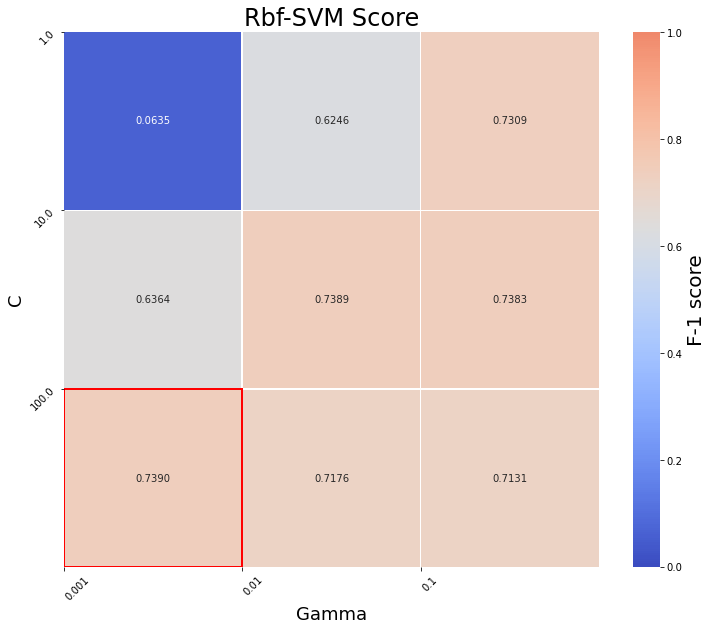

In [42]:

import seaborn as sns
from matplotlib.patches import Rectangle 

print('Best C=',rbfsvm_bestC,'Best gamma=',rbfsvm_bestgamma,'best f1 score= ', F1_rbfsvm_best)

def rbfsvm_heatpmap (gamma_list, C_list, F1_rbfsvm, best_i, best_j):
    plt.subplots(figsize=(12,12))
    fig=sns.heatmap(F1_rbfsvm,
                cmap='coolwarm',
                linewidth=0.5,
                center=np.mean(F1_rbfsvm),
                robust=True,
                vmin=0.0,
                vmax =1.0,
                square=True,
                annot=True,
                fmt=".4f",
                cbar_kws={'label': 'F-1 score','shrink': .82})
    plt.title('Rbf-SVM Score',fontsize=24)
    plt.xlabel('Gamma',fontsize=18)
    plt.ylabel('C',fontsize=18)
    fig.figure.axes[-1].yaxis.label.set_size(20)
    plt.xticks(np.arange(len(gamma_list)), [round(gamma, 6) for gamma in gamma_list ],rotation=45,ha="left")
    plt.yticks(np.arange(len(C_list)), [round(C, 4) for C in C_list ], rotation=45)
    fig.add_patch(Rectangle((best_j,best_i),1,1, fill=False, edgecolor='red', lw=2))
    plt.show()

rbfsvm_heatpmap(gamma_list, C_list, F1_rbfsvm, best_i, best_j)
